津
京
京
冀
川
沪
晋
川
川
浙
渝
晋
浙
川
冀
京
沪
川
浙
桂
桂
浙
渝
浙
渝
湘
桂
桂
宁
冀
川
桂
桂
浙
浙
渝
浙
京
京
渝
京
桂
沪
浙
川
冀
沪
沪
浙
冀
川
川
湘
川
京
冀
沪
沪
晋
桂
沪
渝
浙
川
湘
川
冀
云
桂
川
川
冀
沪
晋
川
冀
湘
浙
湘
浙
川
冀
浙
桂
湘
川
川
浙
吉
京
湘
津
桂
渝
浙
浙
桂
浙
桂
京
浙
桂
浙
津
津
京
桂
湘
浙
湘
桂
京
沪
桂
桂
渝
沪
京
津
湘
浙
浙
冀
晋
川
川
湘
浙
浙
川
京
桂
湘
湘
浙
吉
川
川
湘
浙
晋
冀
浙
桂
川
桂
川
浙
桂
川
晋
沪
川
桂
川
冀
浙
桂
浙
浙
浙
琼
京
湘
浙
吉
桂
浙
甘
津
桂
川
桂
沪
浙
浙
川
晋
浙
浙
吉
湘
吉
宁
湘
浙
京
湘
浙
京
桂
川
沪
浙
湘
皖
吉
吉
琼
浙
浙
桂
湘
川
川
湘
川
渝
沪
湘
川
甘
川
湘
川
云
湘
浙
冀
京
湘
渝
浙
渝
桂
浙
桂
皖
京
浙
桂
冀
湘
皖
晋
川
晋
皖
湘
川
浙
晋
京
云
桂
川
川
桂
湘
桂
桂
桂
皖
甘
京
浙
川
渝
桂
川
冀
桂
桂
桂
沪
渝
川
湘
浙
京
湘
浙
皖
京
皖
京
冀
宁
吉
沪
沪
京
京
川
湘
桂
川
云
湘
皖
湘
皖
桂
沪
浙
粤
云
桂
湘
云
皖
冀
皖
皖
粤
云
桂
冀
宁
津
浙
浙
京
皖
渝
琼
渝
渝
川
琼
桂
皖
桂
皖
桂
吉
湘
皖
桂
渝
桂
湘
川
晋
浙
湘
渝
晋
湘
云
皖
浙
川
京
湘
皖
皖
皖
川
湘
桂
京
湘
沪
琼
冀
湘
皖
湘
京
桂
皖
桂
浙
皖
沪
浙
津
粤
湘
粤
川
湘
浙
宁
湘
冀
湘
晋
湘
桂
沪
桂
琼
冀
浙
浙
冀
皖
浙
浙
浙
粤
晋
川
桂
桂
渝
桂
湘
津
皖
津
津
湘
粤
桂
粤
桂
桂
京
粤
冀
湘
皖
粤
京
皖
川
粤
湘
湘
粤
津
浙
粤
湘
渝
苏
粤
晋
津
川
湘
津
湘
皖
苏
皖
浙
吉
川
皖
粤
川
桂
皖
晋
云
浙
粤
湘
桂
湘
川
浙
桂
苏
苏
桂
渝
浙
苏
桂
浙
晋
粤
粤
桂
粤
桂
晋
苏
粤
粤
湘
川
蒙
浙
皖
粤
桂
晋
甘
浙
川
粤
湘
浙
琼
渝
云
豫
湘
皖
京
川
琼
云
冀


D:\PythonWin32\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


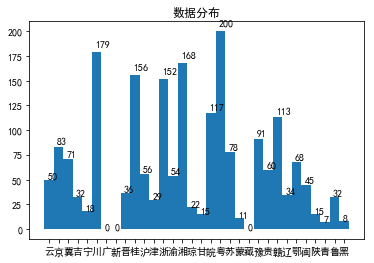

31 31
30 30
29 29


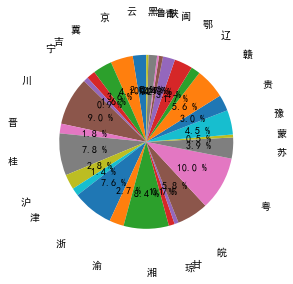

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from math import *
from PIL import Image


labels_dict = {
0:'云',
1:'京',
2:'冀',
3:'吉',
4:'宁',
5:'川',
6:'广',
7:'新',
8:'晋',
9:'桂',
10:'沪',
11:'津',
12:'浙',
13:'渝',
14:'湘',
15:'琼',
16:'甘',
17:'皖',
18:'粤',
19:'苏',
20:'蒙',
21:'藏',
22:'豫',
23:'贵',
24:'赣',
25:'辽',
26:'鄂',
27:'闽',
28:'陕',
29:'青',
30:'鲁',
31:'黑'}

#将文件读取为一个队列
filename_queue = tf.train.string_input_producer(['./zh_character_train.tfrecords'])
reader = tf.TFRecordReader()

_, example = reader.read(filename_queue)
features = tf.parse_single_example(
    example,
    features={
        'label': tf.FixedLenFeature([], tf.string),
        'image_raw':tf.FixedLenFeature([], tf.string)
    }
)

#还原图像和标签 
image = tf.decode_raw(features['image_raw'], tf.uint8) 
image = tf.reshape(image, [28, 28, 1])
label = tf.decode_raw(features['label'], tf.int64)
label = tf.reshape(label, [32]) 

# 打乱图像顺序,并做批次处理
image_batch, label_batch = tf.train.shuffle_batch([image, label],
                                                batch_size=1,
                                                capacity=4000,
                                                num_threads=2,
                                                min_after_dequeue=1000)
image = tf.reshape(image_batch, (28, 28))
label = tf.reshape(label_batch, (1, 32))


with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    ##可视化tfrecords中的图像
    la_dic = {k:0 for k in range(32)}
    for i in range(2000):
        mg, labels = sess.run([image, label])
        la_dic[list(labels[0]).index(1)] += 1
        print(labels_dict[list(labels[0]).index(1)])
        #黑白反向
        # im = Image.fromarray(255-img)
        # im.show()
    a=tuple(la_dic.keys())
    b=tuple(la_dic.values())
    c=tuple(labels_dict.values())
    print(len(a))

    # 中文显示
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus']=False
    
    # 柱状图
    figure = plt.figure(32)
    rects = plt.bar(left = a, 
                    height = b, 
                    width = 1, 
                    align="center", 
                    yerr=0.000001)
    for rect in rects:
        h = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/3., 1.03*h, '%s' % int(h))
    plt.title('数据分布')
    plt.xticks(a, tuple(labels_dict.values()))
    plt.show()
    
    #饼状图
    frlist = [i/sum(la_dic.values()) for i in la_dic.values()]
    labels = ['云', '京', '冀', '吉', '宁', '川', '广', '新','晋', '桂', '沪', '津',
             '浙', '渝', '湘', '琼', '甘', '皖', '粤', '苏', '蒙', '藏', '豫', '贵', 
             '赣', '辽', '鄂', '闽', '陕', '青', '鲁', '黑']
    # 去零
    while True:
        try:
            ind = frlist.index(0)
            del frlist[ind]
            del labels[ind]
            print(len(frlist),len(labels))
        except ValueError:
            break 
    le = len(frlist)
    fracs = frlist
    explode = [0]*le # 0.1 凸出这部分，
    plt.axes(aspect=1)
    plt.pie(x=fracs, labels=labels, 
            explode=explode,autopct='%3.1f %%',
            shadow=False, 
            labeldistance=1.5,
            startangle = 90,
            pctdistance = 0.6    
            )
    plt.show()

    coord.request_stop()
    coord.join(threads)